# Introduction to Convolution Neural Network

Convolutional Neural Network (CNN) is an advanced version of artificial neural networks (ANNs), primarily designed to extract features from grid-like matrix datasets. This is particularly useful for visual datasets such as images or videos, where data patterns play a crucial role. CNNs are widely used in computer vision applications due to their effectiveness in processing visual data.

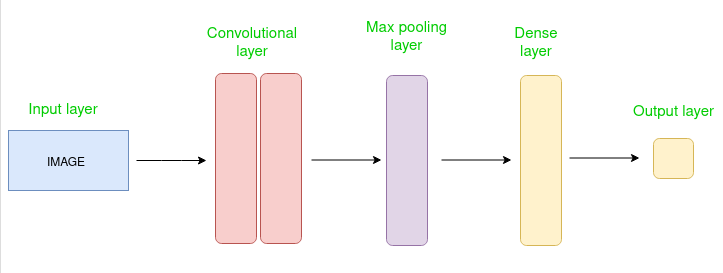

# Convolutional Neural Network (CNN) in Tensorflow

Convolutional Neural Networks (CNNs) are used in the field of computer vision. There ability to automatically learn spatial hierarchies of features from images makes them the best choice for such tasks. In this article we will explore the basic building blocks of CNNs and show us how to implement a CNN model using TensorFlow.

### Installation process:


In [ ]:
%pip install numpy pandas matplotlib scikit-learn tensorflow

### 1. Importing Libraries
We will import matplotlib and tensorflow for its implementation.




In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)
print("All libraries imported successfully!")

TensorFlow version: 2.19.0
All libraries imported successfully!


### 2. Loading and Preprocessing the Dataset
We will be using CIFAR-10 dataset. It is a popular benchmark dataset used for machine learning and computer vision tasks particularly for image classification. It contains 60,000, 32x32 color images divided into 10 classes with 6,000 images per class.

1. Normalization: The pixel values in images range from 0 to 255. We normalize the images by dividing by 255 to scale them to a range of 0 to 1. This helps with model convergence during training.
2. to_categorical(): Converts the integer labels into a one-hot encoded format where each label is represented as a binary vector indicating the class.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### 3. Defining the CNN Model
* models.Sequential(): Initializes a linear stack of layers where each layer has exactly one input and one output.
* Conv2D: Adds a convolutional layer with 32 filters, each of size (3, 3).
* MaxPool2D: Adds a max pooling layer to downsample the feature maps from the previous convolutional layer.
* Flatten: Flattens the output from the convolutional layers into a 1D vector which is required for the fully connected (dense) layers.
* Dense: Fully connected layer with 128 units and ReLU activation.

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 4. Compiling the Model
**The Adam optimizer** is used for gradient-based optimization. It adjusts the learning rate based on first and second moments of the gradients.

**Categorical cross entropy** is used as the loss function for multi-class classification problems.

**metrics=['accuracy']:** Specifies that we want to track accuracy during training and evaluation.

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 5. Training the Model
* The model will train for 10 iterations over the entire dataset.
* The model will process 64 images at a time before updating the weights.
* The test set is used for validation after each epoch to track the model's performance on unseen data.

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - accuracy: 0.3843 - loss: 1.7311 - val_accuracy: 0.5411 - val_loss: 1.3043
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - accuracy: 0.5701 - loss: 1.2255 - val_accuracy: 0.5944 - val_loss: 1.1581
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.6212 - loss: 1.0813 - val_accuracy: 0.6194 - val_loss: 1.0944
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.6580 - loss: 0.9908 - val_accuracy: 0.6213 - val_loss: 1.0858
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.6860 - loss: 0.9034 - val_accuracy: 0.6233 - val_loss: 1.1014
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.7055 - loss: 0.8404 - val_accuracy: 0.6417 - val_loss: 1.0412
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.7273 - loss: 0.7841 - val_accuracy: 0.6515 - val_loss: 1.0084
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.7483 - loss: 0.7278 - 

### 6. Evaluating the Model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6331 - loss: 1.0794
Test accuracy: 63.65%


Test accuracy is 63.65% which is good for simple CNN model we can increase its accuracy further by optimizing the model based on our task.

### 7. Plotting Training History

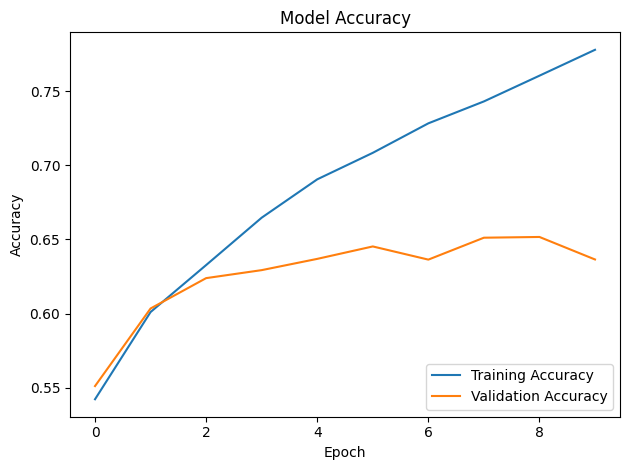

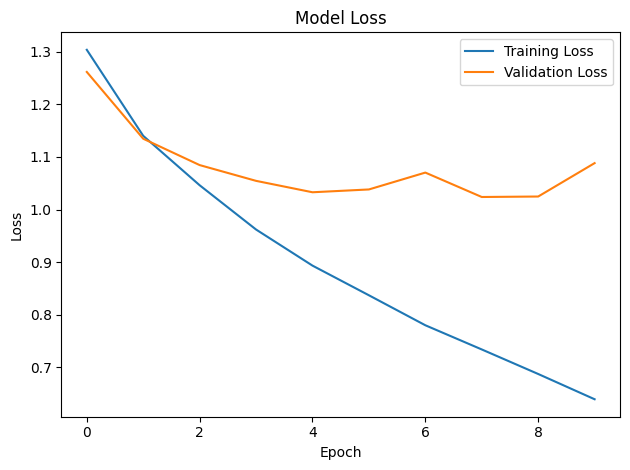

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

From the graph we can observe that the training accuracy increases steadily indicating that the model is learning and improving over time. However the validation accuracy shows some fluctuation particularly in the earlier epochs before stabilizing. This suggests that the model is generalizing well to the unseen validation data, although there is still room for improvement particularly in reducing the gap between training and validation accuracy.